## SLR on Patient Weights and Treatment Costs

In [2]:
# import basic library

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

In [69]:
#import the dataset
df = pd.read_excel('Hospital.xlsx')
df = df.drop(['RNo'],axis = 1)
df

,BodyWeight,CostofTreatment
0,32,148652.00
1,32,128104.37
2,33,133087.00
3,35,124804.00
4,36,199790.00
...,...,...
115,77,133130.00
116,78,293127.00
117,78,188824.00
118,78,149462.00


In [5]:
# Goal: Predict the cost of hospital treatment based on Patient Body Weight

In [7]:
# Check for missing values
df.isnull().sum()

RNo                0
BodyWeight         0
CostofTreatment    0
dtype: int64

In [8]:
# There is no missing values

In [12]:
# let X be Patient Body weight and y be Cost of Treatment
X = sm.add_constant(df['BodyWeight'])
y = df['CostofTreatment']

In [10]:
# To avoid overfitting, train-test split is performed.
# 80% of data will be used for training, while the rest is used for testing

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.8, random_state = 101)

# random_state is used to control any randomness and get consistent results.

In [24]:
# construct a SLR model for train data
model = sm.OLS(y_train, X_train).fit()
y_pred_train = model.predict(X_train)

In [26]:
model.params

const         122898.292127
BodyWeight      1759.408243
dtype: float64

In [32]:
# Here we got reg. coefficients: y = 122898 + 1759.4(X)

In [33]:
# Do residual Analysis - to check assumptions of Linear Regression Model for model appropriateness

In [34]:
# pp plot
import matplotlib.pyplot as plt
cost_residuals = model.resid

In [35]:
def standardize(vals):
    return (vals - vals.mean())/vals.std()

Text(0, 0.5, 'Standardized Residuals')

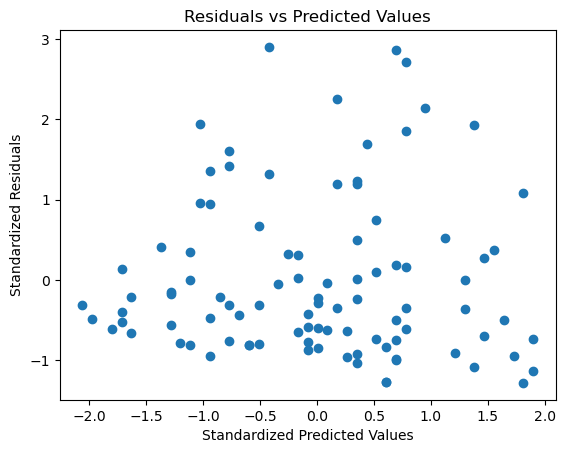

In [36]:
plt.scatter(standardize(model.fittedvalues), standardize(cost_residuals))
plt.title('Residuals vs Predicted Values')
plt.xlabel('Standardized Predicted Values')
plt.ylabel('Standardized Residuals')

## Residuals satisties the homoscedasticity assumption

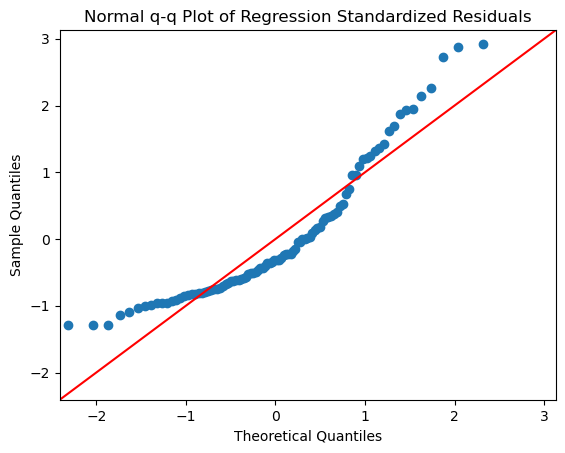

In [39]:
import scipy.stats as st

probplot = sm.graphics.qqplot(cost_residuals, dist = st.norm, line = '45', fit = True)
plt.title('Normal q-q Plot of Regression Standardized Residuals')
plt.show()

# Data is normally distributed

In [29]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        CostofTreatment   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                  0.032
Method:                 Least Squares   F-statistic:                     4.129
Date:                Tue, 06 Dec 2022   Prob (F-statistic):             0.0450
Time:                        20:13:00   Log-Likelihood:                -1238.6
No. Observations:                  96   AIC:                             2481.
Df Residuals:                      94   BIC:                             2486.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.229e+05   4.95e+04      2.484      0.015    2.47e+04    2.21e+05
BodyWeight  1759.4082    865.879      2.032      0.045      40.185    3478.631
==============================================================================
Omnibus:                       19.008   Durbin-Watson:                   1.635
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.068
Skew:                           1.161   Prob(JB):                     9.79e-06
Kurtosis:                       3.612   Cond. No.                         282.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
# Evaluate model performance metrics
from sklearn.metrics import r2_score
print('r-squared for the train data: ',r2_score(y_train, y_pred_train))

# Model only represent 4.2% of variance in Y

r-squared for the train data:  0.04207485960405977


In [ ]:
# Although the r-squares is really low, the regression coefficient is statistically significant.

### Try to used Log transformation on SLR model

## Model 2: y = b0 + b1 (log(X))
There is a unit change in Y for a percentage change in X

In [41]:
# Turn BodyWeight into log-transformed data

df1 = df.copy()
df1['BodyWeight'] = np.log(df['BodyWeight'])

In [49]:
X1 = sm.add_constant(df1['BodyWeight'])
y1 = df1['CostofTreatment']

In [50]:
# Perform train-test split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1,y1, train_size = 0.8, random_state = 101)

In [54]:
# Construct the model

model1 = sm.OLS(y_train1,X_train1).fit()
y_pred_train1 = model1.predict(X_train1)

In [55]:
# Regression coefficient of the model: y = -183181 + 101084 (log(x))

model1.params

const        -183180.993192
BodyWeight    101084.152144
dtype: float64

In [56]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        CostofTreatment   R-squared:                       0.049
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     4.823
Date:                Tue, 06 Dec 2022   Prob (F-statistic):             0.0305
Time:                        20:36:45   Log-Likelihood:                -1238.3
No. Observations:                  96   AIC:                             2481.
Df Residuals:                      94   BIC:                             2486.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.832e+05   1.84e+05     -0.993      0.323   -5.49e+05    1.83e+05
BodyWeight  1.011e+05    4.6e+04      2.196      0.031    9696.158    1.92e+05
==============================================================================
Omnibus:                       18.631   Durbin-Watson:                   1.636
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.463
Skew:                           1.147   Prob(JB):                     1.32e-05
Kurtosis:                       3.593   Cond. No.                         78.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
print('r-squared for the train data: ',r2_score(y_train1, y_pred_train1))

r-squared for the train data:  0.048806633223558826


In [ ]:
# The r-squared are slightly higher then the previous model

## Model 2: log(y) = b0 + b1(X)
There is a percentage change in Y for a unit change in X

In [58]:
# Turn the Cost of Treatment into log-transformed data
df2 = df.copy()
df2['Costoftreatment'] = np.log(df2['CostofTreatment'])

In [59]:
X2 = sm.add_constant(df['BodyWeight'])
y2 = df2['CostofTreatment']

In [60]:
# Perform train-test split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2,y2, train_size = 0.8, random_state = 102)

In [62]:
# Construct the model
model2 = sm.OLS(y2,X2).fit()

In [65]:
model2.params

const         127498.079394
BodyWeight      1678.933253
dtype: float64

In [ ]:
# Here we got reg coeff: log(y) = 127498 + 1678(X)

In [66]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        CostofTreatment   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     4.835
Date:                Tue, 06 Dec 2022   Prob (F-statistic):             0.0298
Time:                        20:44:58   Log-Likelihood:                -1546.6
No. Observations:                 120   AIC:                             3097.
Df Residuals:                     118   BIC:                             3103.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.275e+05   4.38e+04      2.909      0.004    4.07e+04    2.14e+05
BodyWeight  1678.9333    763.569      2.199      0.030     166.860    3191.007
==============================================================================
Omnibus:                       19.778   Durbin-Watson:                   1.773
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.000
Skew:                           1.072   Prob(JB):                     6.14e-06
Kurtosis:                       3.452   Cond. No.                         286.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [67]:
# Here we got the lower r-square than the previous models

## Model 4: log(y) = b0 + b1 (log(X)
There is a percentage change in y for a percentage change in X

In [70]:
# Convert all the data into log-transformed variable
df3 = df.copy()
df3 = np.log(df3)
df3

,BodyWeight,CostofTreatment
0,3.465736,11.909363
1,3.465736,11.760601
2,3.496508,11.798758
3,3.555348,11.734500
4,3.583519,12.205022
...,...,...
115,4.343805,11.799081
116,4.356709,12.588361
117,4.356709,12.148571
118,4.356709,11.914797


In [72]:
X3 = sm.add_constant(df3['BodyWeight'])
y3 = df3['CostofTreatment']

In [73]:
# Perform train_test split
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3,y3, train_size = 0.8, random_state=101)

In [79]:
# Construct the model
model3 = sm.OLS(y3, X3).fit()

In [75]:
model3.params

const         10.470114
BodyWeight     0.437819
dtype: float64

In [ ]:
# Here we got: log(y) = 10.47 + 0.437 (log(X))

In [76]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        CostofTreatment   R-squared:                       0.055
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     6.819
Date:                Tue, 06 Dec 2022   Prob (F-statistic):             0.0102
Time:                        21:09:49   Log-Likelihood:                -58.014
No. Observations:                 120   AIC:                             120.0
Df Residuals:                     118   BIC:                             125.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.4701      0.673     15.561      0.000       9.138      11.803
BodyWeight     0.4378      0.168      2.611      0.010       0.106       0.770
==============================================================================
Omnibus:                        8.319   Durbin-Watson:                   1.730
Prob(Omnibus):                  0.016   Jarque-Bera (JB):                6.111
Skew:                           0.430   Prob(JB):                       0.0471
Kurtosis:                       2.306   Cond. No.                         79.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [78]:
# Here we got the higher r-squared that the previous models. r-squares = 0.055

In [ ]:
# Perform Residual analyisi on the better model

In [81]:
cost_residuals1 = model3.resid

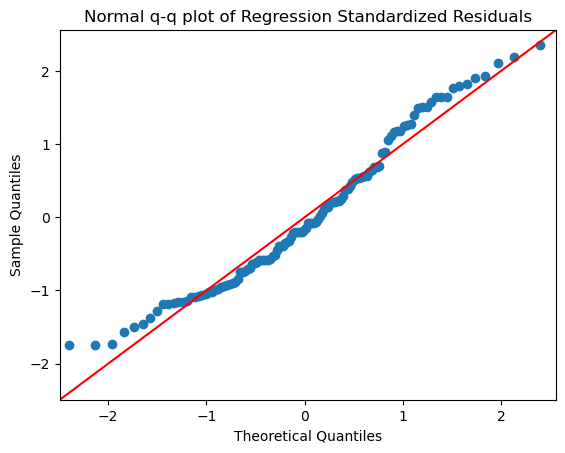

In [83]:
qqplot = sm.graphics.qqplot(cost_residuals1, dist = st.norm, line = '45', fit=True)
plt.title('Normal q-q plot of Regression Standardized Residuals')
plt.show()

Text(0, 0.5, 'Standardized Residuals')

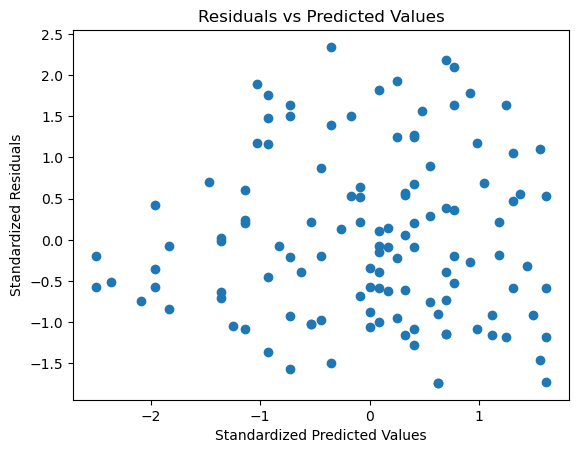

In [82]:
plt.scatter(standardize(model3.fittedvalues), standardize(cost_residuals1))
plt.title('Residuals vs Predicted Values')
plt.xlabel('Standardized Predicted Values')
plt.ylabel('Standardized Residuals')

* if it is compared with the first model, the data is more normally distributed and the residuals are more dispersed